* **InvoiceNo**: Data type: String. Contains the invoice number for each transaction, where each number can represent multiple items purchased in a single transaction.


* **StockCode**: Data type: String. Represents the product code for each item.


* **Description**: Data type: String. Contains product descriptions. Some entries are missing, with 540,455 non-null values (99.73% complete).


* **Quantity**: Data type: Integer. Indicates the number of products purchased in each transaction.


* **InvoiceDate**: Data type: Datetime. Records the date and time of each transaction.


* **UnitPrice**: Data type: Float. Represents the unit price of each item.


* **CustomerID**: Data type: Float. Contains the customer ID for each transaction. 


* **Country**: Data type: String. Records the country where each transaction took place.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('E-Commerce_data.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df['Country'].value_counts(normalize=True)*100

Country
United Kingdom          91.431956
Germany                  1.752139
France                   1.579047
EIRE                     1.512431
Spain                    0.467422
Netherlands              0.437527
Belgium                  0.381798
Switzerland              0.369435
Portugal                 0.280305
Australia                0.232327
Norway                   0.200403
Italy                    0.148180
Channel Islands          0.139876
Finland                  0.128250
Cyprus                   0.114779
Sweden                   0.085254
Unspecified              0.082302
Austria                  0.073998
Denmark                  0.071783
Japan                    0.066063
Poland                   0.062926
Israel                   0.054806
USA                      0.053699
Hong Kong                0.053145
Singapore                0.042258
Iceland                  0.033585
Canada                   0.027864
Greece                   0.026942
Malta                    0.023436
United

In [8]:
cat_col = df.select_dtypes(include=['object']).columns

for col in cat_col:
    print(f'Categorical data: {col}')
    print(df[col].value_counts())

Categorical data: InvoiceNo
InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: count, Length: 25900, dtype: int64
Categorical data: StockCode
StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: count, Length: 4070, dtype: int64
Categorical data: Description
Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE P

In [9]:
num_col = df.select_dtypes(include=['number']).columns

for col in num_col:
    print(f'Numeric data: {col}')
    print(df[col].value_counts())

Numeric data: Quantity
Quantity
 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: count, Length: 722, dtype: int64
Numeric data: UnitPrice
UnitPrice
1.25      50496
1.65      38181
0.85      28497
2.95      27768
0.42      24533
          ...  
84.21         1
46.86         1
28.66         1
156.45        1
224.69        1
Name: count, Length: 1630, dtype: int64
Numeric data: CustomerID
CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64


## Data Preprocessing
Key points (RFM Analysis)

* Recency: How recent was a customer's latest purchase?
* Frequency: How often does a customer make purchases?
* Monetary: How much does a customer spend?

In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [11]:
# CustomerID contain too many NA value, drop it
df.dropna(subset=['CustomerID'], inplace=True)

In [12]:
df['Description'] = df['Description'].astype('str')

# remove extra whitespaces
df['Description'] = df['Description'].str.strip()

In [13]:
na_percentage = df.isna().mean()*100

na_percentage

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [14]:
df.shape

(406829, 8)

In [15]:
duplicates = df.duplicated()

duplicates.sum()

5225

In [16]:
df[duplicates]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [17]:
# Remove duplicate rows
df = df.drop_duplicates()

df.reset_index(drop=True, inplace=True)

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
df.shape

(401604, 8)

In [20]:
df = df[~df['InvoiceNo'].str.contains('C')]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [21]:
# 設定一個分析的參考日期，這個日期應該在數據集中最晚的交易日期之後一天
# 這樣做是為了確保計算的 "最近一次購買" 是相對於數據集中已知的最後一次交易
# +1 包括當天的紀錄, 與保持一致性還有能避免 Recency為 0的狀況
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [22]:
rfm = df.groupby('CustomerID').agg(
     # 計算與最新日期的差異並轉為天數
    {'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
     # 計算每個客戶的交易次數,反應頻率
     'InvoiceNo': 'count',
     # 每個客戶的購買金額 (UnitPrice * Quantity)
     'UnitPrice': lambda x: (x * df.loc[x.index, 'Quantity']).sum()}
    ).rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','UnitPrice':'MonetaryValue'})

In [23]:
rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


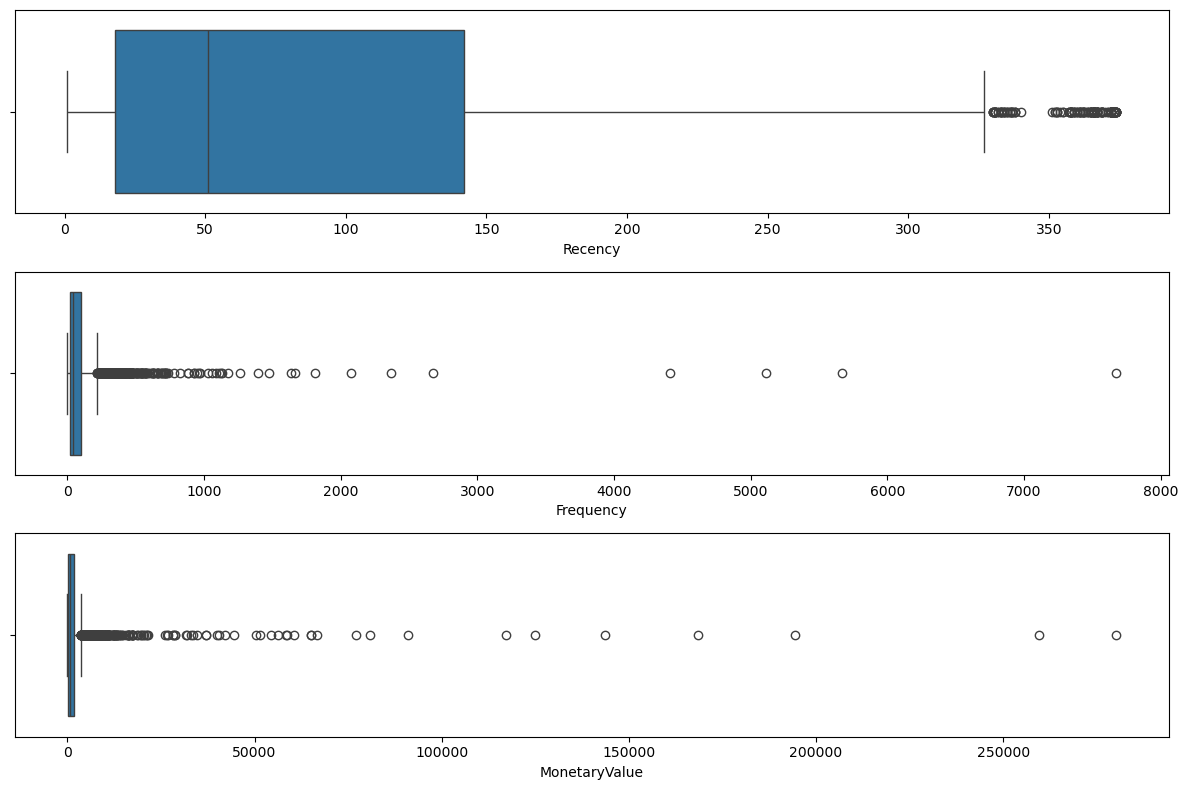

In [24]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
sns.boxplot(x=rfm['Recency'])
plt.subplot(3, 1, 2)
sns.boxplot(x=rfm['Frequency'])
plt.subplot(3, 1, 3)
sns.boxplot(x=rfm['MonetaryValue'])
plt.tight_layout()
plt.show()

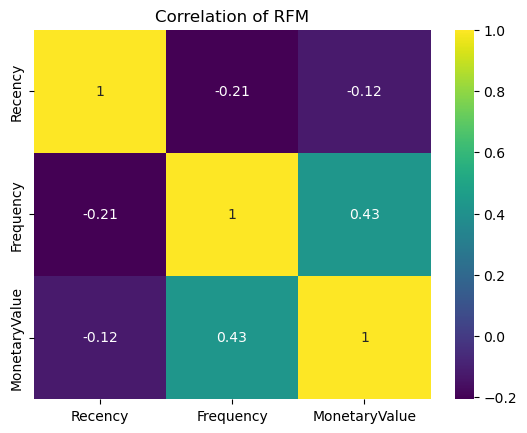

In [25]:
rfm_corr = rfm[['Recency','Frequency','MonetaryValue']].corr()

sns.heatmap(rfm_corr, annot=True, cmap='viridis')
plt.title('Correlation of RFM')
plt.show()

## Detect Outliers

In [26]:
from pyod.models.knn import KNN
from pyod.models.ecod import ECOD
from pyod.models.iforest import IForest
from pyod.models.pca import PCA
from pyod.models.lof import LOF
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [27]:
def detect_outliers(X, contamination=0.1):
    models = {
        'KNN': KNN(contamination=contamination),
        'ECOD': ECOD(contamination=contamination),
        'IForest': IForest(contamination=contamination),
        'LOF': LOF(contamination=contamination)}
    outliers = {}
    for model_name, model in models.items():
        model.fit(X)
        outliers[model_name] = model.labels_ # 注意是 labels_, 表示是否為離群值
    return outliers

In [28]:
def combined_outliers(outliers, strategy='all'):
    if strategy == 'all':
        return np.any(list(outliers.values()), axis=0)
    elif strategy == 'union':
        return np.any(list(outliers.values()), axis=0)
    elif strategy == 'intersection':
        return np.all(list(outliers.values()), axis=0)

In [29]:
X = rfm[['Recency', 'Frequency', 'MonetaryValue']] 
outliers = detect_outliers(X, 0.1)
combined_result = combined_outliers(outliers, strategy='all')

# 將標記為離群值的數據點轉換為整數
combined_result_int = combined_result.astype(int)

# 過濾掉檢測到的離群值
filtered_X = X[~combined_result]

In [30]:
# Built Pipeline
pipeline = Pipeline([('scaler',StandardScaler()),
                     ('pca',PCA()),
                     ('kmeans',KMeans(random_state=42))])

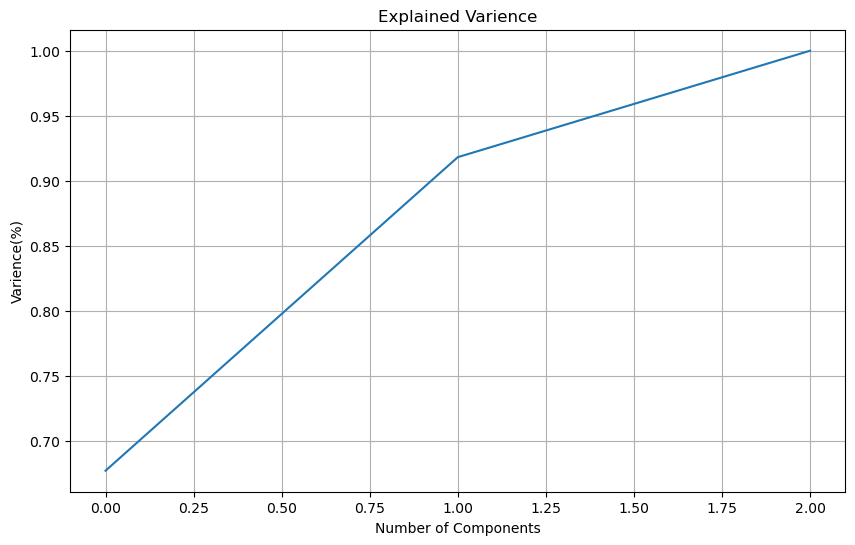

In [31]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(filtered_X)
pca = PCA().fit(rfm_scaled)

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Varience(%)')
plt.title('Explained Varience')
plt.grid(True)
plt.show()

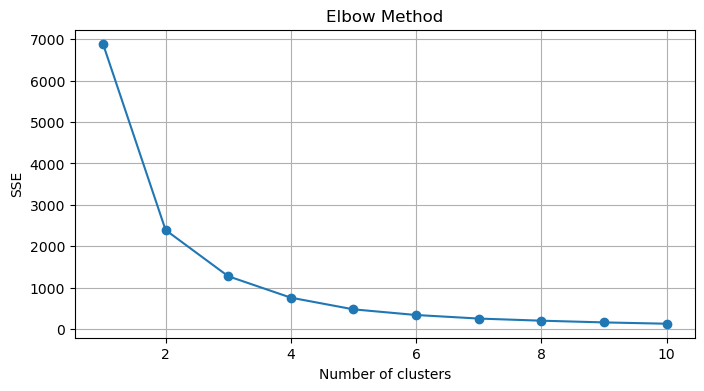

In [32]:
pca = PCA(n_components=1)
pipeline.set_params(pca=pca)

sse = []
for k in range(1, 11):
    pipeline.set_params(kmeans=KMeans(n_clusters=k, random_state=42))
    pipeline.fit(rfm_scaled)
    sse.append(pipeline.named_steps['kmeans'].inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [33]:
pipeline.set_params(pca=PCA(n_components=0.95), kmeans=KMeans(n_clusters=4, random_state=42))
pipeline.fit(rfm_scaled)

prediction = pipeline.predict(rfm_scaled)

In [34]:
silhouette_avg = silhouette_score(rfm_scaled, prediction)
print(f'The average silhouette_score is: {silhouette_avg}')

The average silhouette_score is: 0.4332557946378089


## Find the best Parameters
* Seems it can perform better while searching best parameters

In [35]:
def new_detect_outliers(data, contamination):
    models = {
        'KNN': KNN(contamination=contamination),
        'ECOD': ECOD(contamination=contamination),
        'IForest': IForest(contamination=contamination),
        'LOF': LOF(contamination=contamination)}
    
    outliers = np.zeros(len(data), dtype=bool)  
    for model in models.values():
        model.fit(data)
        outliers |= model.labels_ == 1  
    return outliers

### KMeans

In [36]:
def evaluate_clustering(data, contamination, n_components, n_clusters):
    
    outliers = new_detect_outliers(data, contamination)
    
    filtered_data = data[~outliers]
    
    if len(filtered_data) > 1:
        
        pipeline = Pipeline([('scaler',StandardScaler()),
                             ('pca',PCA(n_components=n_components)),
                             ('kmeans',KMeans(n_clusters=n_clusters, random_state=42))])
        
        pipeline.fit(filtered_data)
        
        prediction = pipeline.predict(filtered_data)
        silhouette_avg = silhouette_score(filtered_data, prediction)
        return silhouette_avg
    else:
        return -1

In [37]:
# 由於輪廓系數的範圍是從 -1 到 1，設置 best_score = -1 保證了任何有效的初次評分都會被認為是當前最好的，因為初始值是可能的最低分。
# 而且能確保可以更新下個數字,因為 -1是最小的數字

# contaminations = np.linspace(0.01, 0.2, 20)
# components_ratio = [0.8, 0.9, 0.95, 0.99]
# cluster_counts = [3, 4, 5, 6]
# best_score = -1
# best_params = {}

#for contamination in contaminations:
    #for components in components_ratio:
        #for clusters in cluster_counts:
            #score = evaluate_clustering(rfm_scaled, contamination, components, clusters)
            #if score > best_score:
                #best_score = score
                #best_params = {'contamination': contamination,
                               #'n_components': components,
                               #'n_clusters': clusters}

#outliers = new_detect_outliers(rfm_scaled, best_params['contamination'])
#filtered_data = rfm_scaled[~outliers]
#pipeline = Pipeline([('scaler',StandardScaler()),
                    # ('pca',PCA(n_components=best_params['n_components'])),
                    # ('kmeans',KMeans(n_clusters=best_params['n_clusters'], random_state=42))])

#pipeline.fit(filtered_data)
#prediction = pipeline.predict(filtered_data)

#new_silhouette_avg = silhouette_score(filtered_data, prediction)

#print(f'Optimal Parameters: {best_params} with Silhouette Score: {new_silhouette_avg}')
#Optimal Parameters: {'contamination': 0.02, 'n_components': 0.9, 'n_clusters': 3} 
#with Silhouette Score: 0.48442412187827283

In [38]:
outliers = new_detect_outliers(rfm_scaled, 0.02)
filtered_data = rfm_scaled[~outliers]
pipeline = Pipeline([('scaler',StandardScaler()),
                     ('pca',PCA(n_components=0.9)),
                     ('kmeans',KMeans(n_clusters=3))])

kmeans_model = pipeline.fit(filtered_data)
kmeans_prediction = kmeans_model.predict(filtered_data)

kmeans_silhouette_avg = silhouette_score(filtered_data, kmeans_prediction)

print(f'The average silhouette_score is: {kmeans_silhouette_avg}')

The average silhouette_score is: 0.48673113025243003


### DBSCAN

In [39]:
def evaluate_dbscan(data, eps, min_samples):
  
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    clustering = DBSCAN(eps=eps, min_samples=min_samples)
    labels = clustering.fit_predict(data_scaled)

    # 首先獲取label的唯一集合，然後從中移除表示噪聲的 -1 標籤。再檢查剩餘簇的數量是否大於1。
    # 這樣可以確保計算輪廓系數的前提是存在至少兩個有效的簇, 因為如果只有一個或更少簇 無法計算輪廓係數。
    unique_labels = set(labels)
    if -1 in unique_labels:
        unique_labels.remove(-1)  # 移除噪聲標籤
    if len(unique_labels) > 1:
        # silhouette_score 只有在簇數大於 1 才有效
        silhouette_avg = silhouette_score(data_scaled[labels != -1], labels[labels != -1])
        return silhouette_avg
    else:
        return -1
epsilons = np.linspace(0.1, 2.0, 20)
min_samples_list = range(2, 10)
best_score = -1
best_params = {}

for eps in epsilons:
    for min_samples in min_samples_list:
        score = evaluate_dbscan(rfm_scaled, eps, min_samples)
        if score > best_score:
            best_score = score
            best_params = {
                'epsilon': eps,
                'min_samples': min_samples}

best_clustering = DBSCAN(eps=best_params['epsilon'], min_samples=best_params['min_samples'])
best_clustering.fit(rfm_scaled)

print(f"Optimal Parameters: Epsilon = {best_params['epsilon']}, Min_samples = {best_params['min_samples']} with Best Silhouette Score: {best_score}")

Optimal Parameters: Epsilon = 0.5, Min_samples = 9 with Best Silhouette Score: 0.6213823221010754


In [40]:
# It seems DBSCAN is not working well with using PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.9)), 
    ('dbscan', DBSCAN(eps=0.4, min_samples=7))])

pipeline.fit(rfm_scaled) 

# 先得到 DBSCAN 的 Label
labels = pipeline.named_steps['dbscan'].labels_

# 检查簇的數量，忽略噪聲
unique_labels = set(labels)
if -1 in unique_labels:
    unique_labels.remove(-1)
if len(unique_labels) > 1:
    
    # 先訪問pipeline的Standardscaler,再訪問pca,並將Pca轉換成標準化的數據
    transformed_data = pipeline.named_steps['pca'].transform(pipeline.named_steps['scaler'].transform(rfm_scaled))
    
    # 計算轮廓系数
    silhouette_avg = silhouette_score(transformed_data[labels != -1], labels[labels != -1])
    print(f"The average silhouette_score is: {silhouette_avg}")
else:
    print("Not enough clusters to compute silhouette score.")

Not enough clusters to compute silhouette score.


In [41]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(rfm_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=9)
dbscan_prediction = dbscan.fit_predict(data_scaled)

unique_labels = set(dbscan_prediction)
if -1 in unique_labels:
    unique_labels.remove(-1)

if len(unique_labels) > 1:
    silhouette_avg = silhouette_score(data_scaled[dbscan_prediction != -1], dbscan_prediction[dbscan_prediction != -1])
    print(f"The average silhouette_score is: {silhouette_avg}")
else:
    print("Not enough clusters to compute silhouette score.")


The average silhouette_score is: 0.6213823221010754


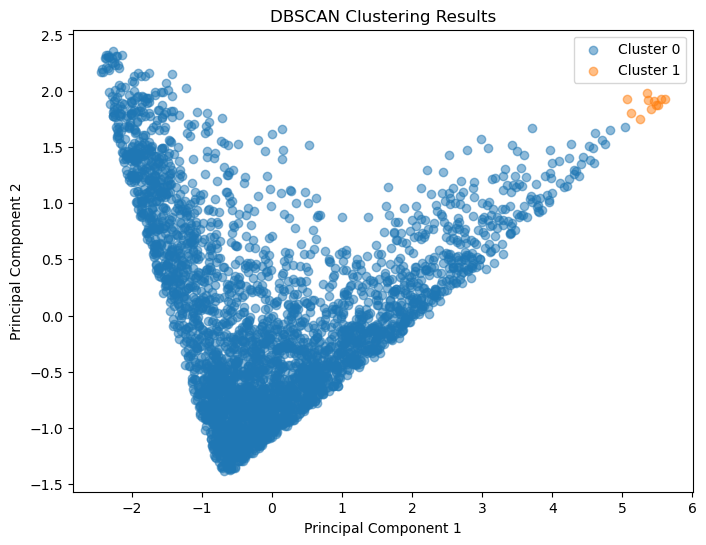

In [42]:
# 降到二維可視化
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
plt.figure(figsize=(8, 6))
for label in unique_labels:
    cluster_mask = (dbscan_prediction == label)
    plt.scatter(data_pca[cluster_mask, 0], data_pca[cluster_mask, 1], label=f'Cluster {label}', alpha=0.5)

plt.title('DBSCAN Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [43]:
cluster_means = pd.DataFrame(data_scaled).groupby(dbscan_prediction).mean()
print("Cluster means:")
print(cluster_means)

Cluster means:
           0         1         2
-1 -0.613091  3.117582  2.752251
 0  0.009050 -0.045684 -0.041892
 1 -0.803853  3.985078  3.993188


1. **Recency（最近一次購買）**：指的是客戶最近一次進行交易的時間距離目前的時間間隔。較短的間隔表示客戶最近活躍，可能是忠誠度較高的客戶。
2. **Frequency（購買頻率）**：指的是在一段時間內客戶進行交易的頻率。頻繁購買的客戶可能更有可能是忠誠度高的客戶。
3. **Monetary（購買金額）**：指的是客戶在一段時間內的總購買金額。較高的購買金額可能意味著客戶價值更高。

* 特徵 0 代表「Recency」、特徵 1 代表「Frequency」、特徵 2 代表「MonetaryValue」，可以根據群集的平均值來理解每個群集的特點：

### 群組標籤 -1
* **Recency (-0.529254)** ：此群組的客戶相對來說最近有進行交易，交易活動較為頻繁。
* **Frequency (2.879136)** ：此群組的客戶交易頻率較高，表示這是一群常常回購的客戶。
* **Monetary Value (2.586942)** ：此群組的客戶在交易中花費的金額也相對較高，顯示其購買力強。

### 群組標籤 0
* **Recency (0.009244)** ：此群組的客戶最近一次交易時間接近平均水平，沒有特別頻繁也不是很久未交易。
* **Frequency (-0.048834)** ：此群組的客戶交易頻率接近平均，可能指一般性的客戶。
* **Monetary Value (-0.046995)** ：此群組的客戶在交易中花費的金額接近平均水平。

### 群組標籤 1
* **Recency (-0.763913)** ：此群組的客戶最近一次交易時間非常近，顯示他們仍然非常活躍。
* **Frequency (3.853164)** ：此群組的客戶交易頻率非常高，表明他們是非常忠誠且活躍的客戶。
* **Monetary Value (4.110146)** ：此群組的客戶在交易中花費的金額非常高，顯示他們是高價值的客戶。



In [44]:
clusterd_df = pd.DataFrame(data=rfm_scaled, columns=['Recency', 'Frequency', 'MonetaryValue'])

clusterd_df['Cluster'] = dbscan_prediction
clusterd_df['CustomerID'] = df['CustomerID']

clusterd_df

,Recency,Frequency,MonetaryValue,Cluster,CustomerID
0,-0.128949,-0.443525,0.908412,0,17850.0
1,-0.756956,0.321913,0.866176,0,17850.0
2,2.506438,-0.698671,-0.648277,0,17850.0
3,-0.566311,0.540609,1.662686,0,17850.0
4,1.631714,0.048542,0.144519,0,17850.0
...,...,...,...,...,...
3389,-0.140164,-0.844469,-0.819074,0,15574.0
3390,2.147577,-0.826244,-0.811944,0,15574.0
3391,1.059779,-0.880918,-0.918125,0,15574.0
3392,-0.880315,-0.789795,-0.814658,0,15574.0


In [45]:
cluster_0 = round(len(clusterd_df[clusterd_df['Cluster'] == 0]) / len(clusterd_df['Cluster'])*100,2)
cluster_neg1 = round(len(clusterd_df[clusterd_df['Cluster'] == -1]) / len(clusterd_df['Cluster'])*100,2)
cluster_pos1 = round(len(clusterd_df[clusterd_df['Cluster'] == 1]) / len(clusterd_df['Cluster'])*100,2)

print(f'Cluster_0: {cluster_0:.2f}%')
print(f'Cluster_neg1: {cluster_neg1:.2f}%')
print(f'Cluster_pos1: {cluster_pos1:.2f}%')

Cluster_0: 98.64%
Cluster_neg1: 1.03%
Cluster_pos1: 0.32%


In [46]:
# look into the noise, cluster=-1
noise_data = clusterd_df[clusterd_df['Cluster'] == -1]
noise_dataframe = pd.DataFrame(noise_data[['Recency','Frequency','MonetaryValue']])
noise_dataframe

,Recency,Frequency,MonetaryValue
58,-0.734528,2.217282,4.322457
85,-0.913958,3.456562,4.761390
119,-0.723313,3.966854,4.921460
257,0.342056,0.759305,1.966555
459,-0.790600,2.089709,4.385753
828,-0.173807,2.764023,0.612769
1021,-0.790600,3.547685,2.299189
1200,0.061696,2.454203,0.166728
1227,-0.229879,3.237865,1.103504
1258,-0.779385,4.367797,1.082306


In [47]:
noise_dataframe.describe()

,Recency,Frequency,MonetaryValue
count,35.000000,35.000000,35.000000
mean,-0.613091,3.117582,2.752251
std,0.354448,1.195835,1.633741
min,-0.947601,-0.133705,0.166728
25%,-0.869100,2.572664,1.092905
50%,-0.768171,3.456562,2.299189
75%,-0.386881,3.948629,4.399311
max,0.342056,4.914538,5.014723


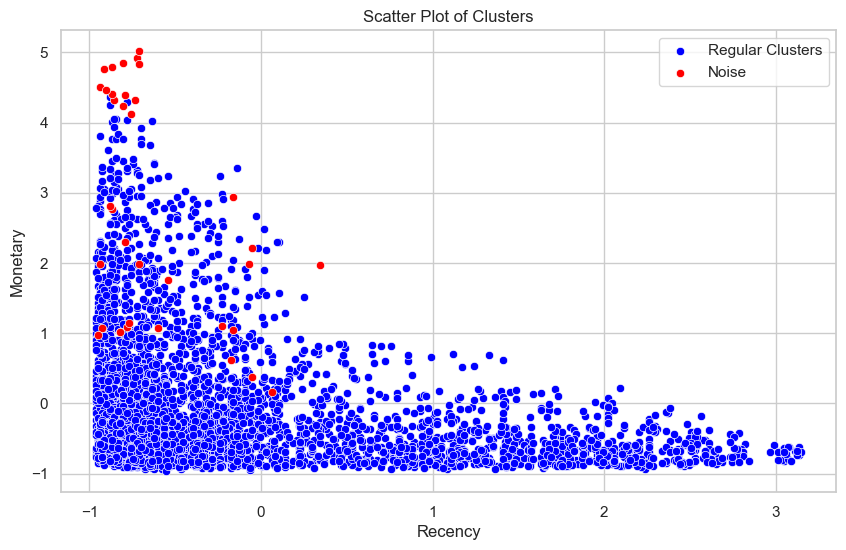

In [48]:
# plot the scatter plot related Receny and MonetaryValue
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# 非噪聲點的scatter plot
sns.scatterplot(clusterd_df[clusterd_df['Cluster'] != -1], x='Recency', y='MonetaryValue', color='blue', label='Regular Clusters')

# 噪聲點的scatter plot
sns.scatterplot(data=noise_data, x='Recency', y='MonetaryValue',  color='red', label='Noise')

plt.title('Scatter Plot of Clusters')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend()
plt.show()